# 02.1 Stopping Times

<h3><span style="color:#800000;"><strong>Authored by:</strong> <em>Alexandre Mathias DONNAT, Sr</em></span></h3>

**Goal of this notebook**

- Define and illustrate the concept of a **stopping time** in discrete-time stochastic processes.  
- Understand the link between **filtrations** (information evolving over time) and **observability** of random events.  
- Simulate concrete examples of stopping times using Python (e.g., hitting times).  
- Prepare the foundation for the Snell envelope and optimal stopping problems in the next notebooks.

**This notebook** 

Builds the intuition needed before we can value American options as optimal stopping problems.

# 1. Stopping Time Defintion

In a discrete-time probability space  
$$
(\Omega, \mathcal{F}, (\mathcal{F}_n)_{0 \le n \le N}, \mathbb{P}),
$$
a **stopping time** $\tau$ is a random variable taking values in  
$\{0, 1, \ldots, N\}$ such that:

$$
\{ \tau \le n \} \in \mathcal{F}_n \quad \text{for all } n.
$$

A stopping time represents a **decision time** determined only by the information available up to that point.  
We can recognize *when it happens*, but not *before* it happens.

Examples:
- “The first time the price reaches 120” → stopping time.  
- “The last time the price reaches 120” → not a stopping time (depends on future outcomes).


# 2. Example: Hitting Time of a Random Walk

We simulate a simple random walk $S_n$ and define the stopping time:

$$
\tau = \inf \{ n \ge 0 : S_n \ge K \}
$$

Hitting level K=3 at step τ = 16


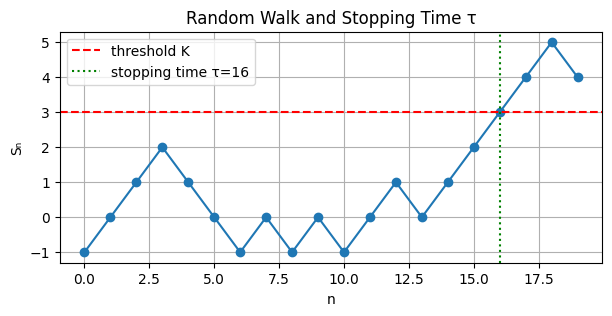

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(40)

N = 20
K = 3
steps = np.random.choice([-1, 1], size=N)
S = np.cumsum(steps)

# Hitting time: first n where S_n >= K
tau = np.argmax(S >= K) if np.any(S >= K) else N

print(f"Hitting level K={K} at step τ = {tau}")

plt.figure(figsize=(7, 3))
plt.plot(range(N), S, marker='o')
plt.axhline(K, color='r', linestyle='--', label='threshold K')
plt.axvline(tau, color='g', linestyle=':', label=f'stopping time τ={tau}')
plt.title("Random Walk and Stopping Time τ")
plt.xlabel("n")
plt.ylabel("Sₙ")
plt.legend()
plt.grid(True)
plt.show()

# 3. Verifying the Information Property

We check that at any date $n$, the event "$\tau \le n$" depends only on $S_0, S_1, \ldots, S_n$.

In code: if we truncate the path at time $n$, we can already tell whether the stopping time has occurred.


In [4]:
def is_tau_leq_n(S, K, n):
    return np.any(S[:n+1] >= K)

for n in range(5):
    print(f"At time n={n}, τ ≤ n ? {is_tau_leq_n(S, K, n)}")

At time n=0, τ ≤ n ? False
At time n=1, τ ≤ n ? False
At time n=2, τ ≤ n ? False
At time n=3, τ ≤ n ? False
At time n=4, τ ≤ n ? False


# 4. Visualization: Evolution of Information

We can visualize this “information flow” using color areas.
At each step, we know whether the stopping event has already occurred; otherwise, we keep observing.

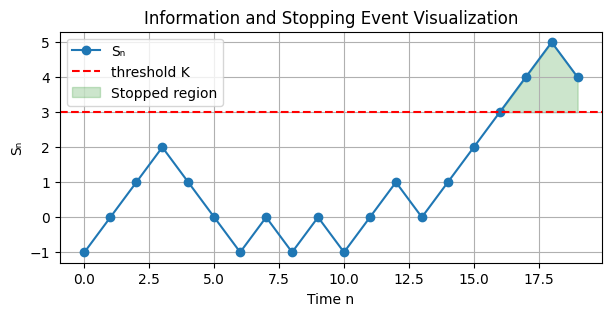

In [5]:
plt.figure(figsize=(7,3))
plt.plot(range(N), S, '-o', label='Sₙ')
plt.axhline(K, color='r', linestyle='--', label='threshold K')
plt.fill_between(range(N), K, S, where=S>=K, color='green', alpha=0.2, label='Stopped region')
plt.title("Information and Stopping Event Visualization")
plt.xlabel("Time n")
plt.ylabel("Sₙ")
plt.legend()
plt.grid(True)
plt.show()

### Notes on outputs :

From the random walk above, the stopping time τ corresponds to the first index where the process crosses the level \(K = 3\).  
Here, the crossing occurs at step **τ = 16**, shown by the green vertical line.

The printed check confirms that for early dates (n = 0 to 4), the event “τ ≤ n” is **False** — meaning that before time 16, no observer using only the information up to n can know that the stopping condition will occur later.  
This perfectly illustrates the **non-anticipative** nature of a stopping time.

On the visualization of information flow, the **green shaded area** appears only after the threshold has been reached.  
Before that moment, the agent has no signal that the event will happen; afterwards, the decision to “stop” is visible and final.

# 6. Extension: Simulating Multiple Trajectories

We now simulate multiple random walks to study the distribution of stopping times.
This highlights that although each path is random, the rule defining τ remains purely information-based.

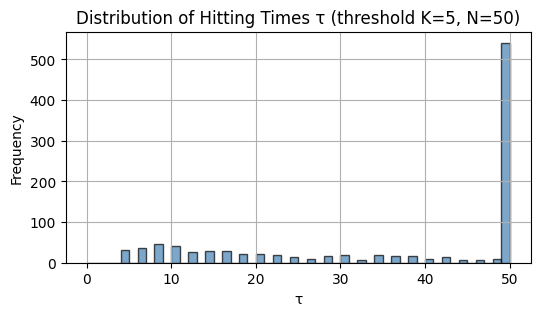

Mean stopping time: 36.08
Probability that τ < N: 45.9%


In [10]:
N = 50
K = 5
M = 1000  # number of simulations

def simulate_tau(N, K):
    steps = np.random.choice([-1, 1], size=N)
    S = np.cumsum(steps)
    tau = np.argmax(S >= K) if np.any(S >= K) else N
    return tau

taus = np.array([simulate_tau(N, K) for _ in range(M)])

plt.figure(figsize=(6,3))
plt.hist(taus, bins=range(0, N+1), color='steelblue', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of Hitting Times τ (threshold K={K}, N={N})")
plt.xlabel("τ")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print(f"Mean stopping time: {np.mean(taus):.2f}")
print(f"Probability that τ < N: {np.mean(taus < N)*100:.1f}%")

### Notes on outputs :

The histogram of hitting times shows how often the random walk reaches the level $K = 5$ within $N = 50$ steps.

We see that:
- A large fraction of paths never reach the threshold before the horizon $N$; these appear as the tall bar at $\tau = 50$ (the terminal value).
- When the level is reached, it usually happens **early** in the process, but the probability of doing so decreases sharply as time progresses.
- The distribution is **skewed right** — small $\tau$ are possible but rare, while many trajectories either hit very late or not at all.

This confirms that $\tau$ is a **random variable** defined by an *information-based rule* rather than by time itself.  
Even though the random walk is symmetric, the stopping mechanism introduces an asymmetry:  
the more time passes without reaching $K$, the smaller the chance of ever hitting it.

Such behaviour is central to **optimal stopping**: different thresholds (or rewards) will shift this distribution and hence the expected value of stopping.
